In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


Load and clean data

In [2]:
df = pd.read_csv("1.1 - India_Historical_Population_Density_Data.csv")

# Clean column names and types
df.rename(columns={"popu1ation_growth_rate": "population"}, inplace=True)
df["population"] = df["population"].str.replace(",", "").astype(int)
df["growth_rate"] = df["growth_rate"].str.replace("%", "").astype(float)
df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()


,year,population,Population_Density,growth_rate
0,2024,1441719852,438.58,0.92
1,2023,1428627663,434.60,0.81
2,2022,1417173173,431.11,0.68
3,2021,1407563842,428.19,0.80
4,2020,1396387127,424.79,0.96


Exploratory data analysis

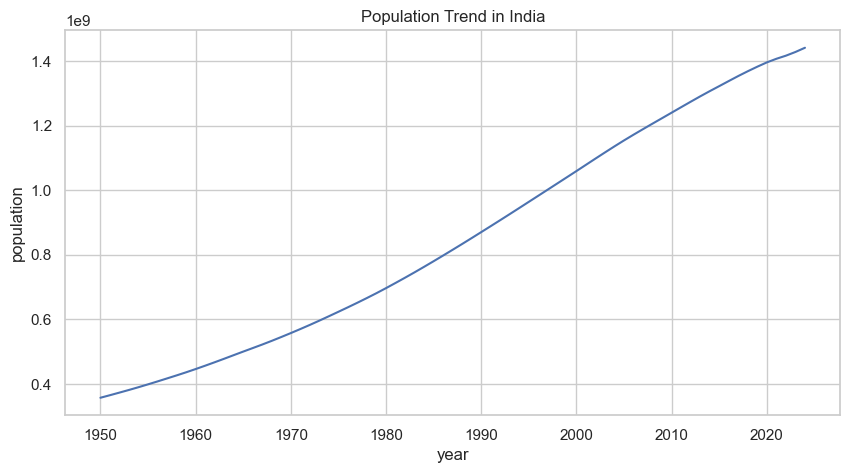

In [3]:
# Population trend
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='population')
plt.title("Population Trend in India")
plt.show()





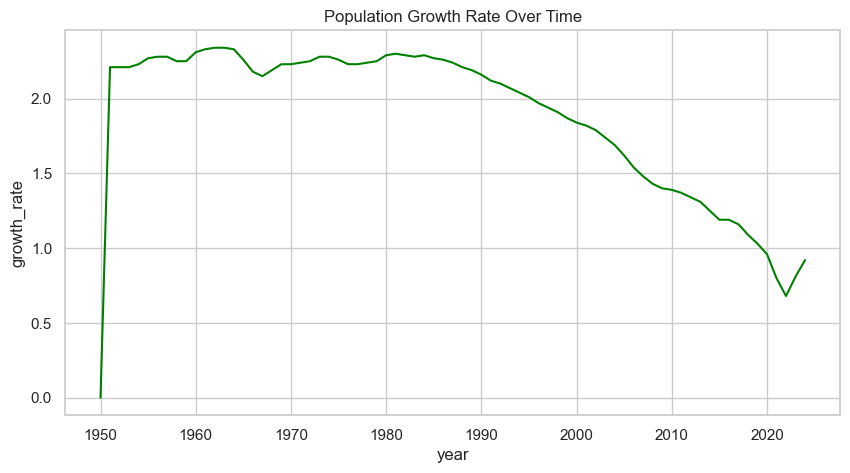

In [4]:

# Growth rate trend
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='growth_rate', color='green')
plt.title("Population Growth Rate Over Time")
plt.show()


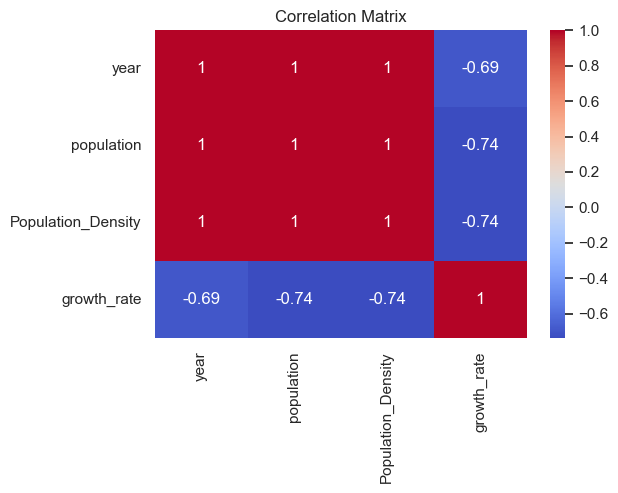

In [5]:
# Correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Linear Regression

MSE: 76.50020312505555


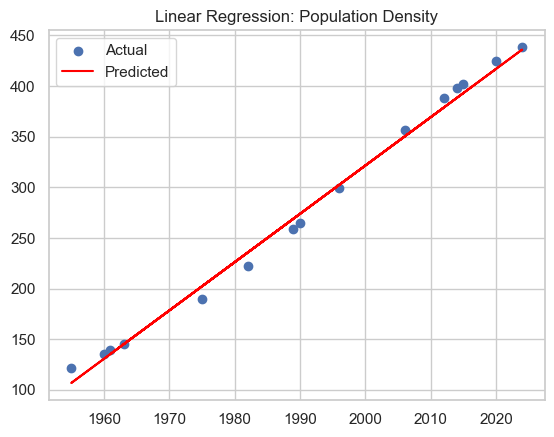

In [6]:
X = df[['year']]
y = df['Population_Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.title("Linear Regression: Population Density")
plt.show()


Deep Learning lstm time line

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


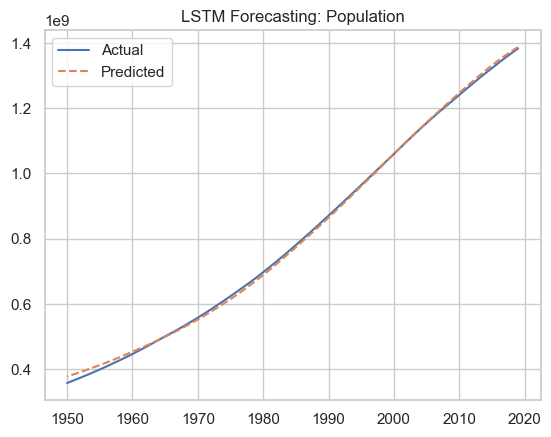

In [7]:
from sklearn.preprocessing import MinMaxScaler

data = df[['population']].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 5
X_lstm, y_lstm = create_sequences(data_scaled, seq_len)

X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_lstm, y_lstm, epochs=50, verbose=0)

# Predict and invert scale
pred_scaled = model.predict(X_lstm)
pred = scaler.inverse_transform(pred_scaled)

# Plot
plt.plot(df['year'][seq_len:], df['population'][seq_len:], label='Actual')
plt.plot(df['year'][seq_len:], pred.flatten(), label='Predicted', linestyle='--')
plt.legend()
plt.title("LSTM Forecasting: Population")
plt.show()


 NLP: Simulated Policy Document Analysis

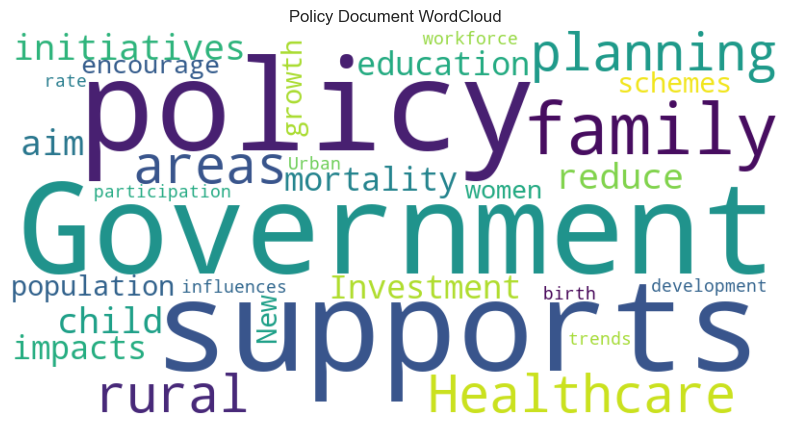

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

documents = [
    "Government policy supports family planning in rural areas.",
    "Healthcare initiatives aim to reduce child mortality.",
    "Investment in education impacts population growth.",
    "New schemes encourage women's participation in workforce.",
    "Urban development influences birth rate trends."
]

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(documents))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Policy Document WordCloud")
plt.show()


# Conclusion (Markdown cell)
"""
- 📈 Population growth rate is slowing down, but absolute population continues to rise.
- 🤖 Machine Learning (Linear Regression) offers basic trend predictions.
- 🧠 LSTM model captures time-dependent dynamics and provides better forecasts.
- 📝 NLP can be used to analyze textual policy documents impacting demographic trends.

Future Work:
- Add real news/policy data using web scraping or APIs
- Expand to regional birth rate comparisons
- Deploy models with Streamlit dashboard for interactivity
"""
